**Name: Amir Mohammad Ezzati**

**Student Number: 402212269**




# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [70]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST`
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)

X, y = fashion_mnist['data'], fashion_mnist['target']

#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

(70000, 784) (70000,)


In [71]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets.
# Set the test_size to 10000

#############################
# Your code goes here (6 points)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [72]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above.
#############################
# Your code goes here (4 points)

def filter_classes(x, y):
  selected_classes = [0, 1, 7]
  y = y.astype(int)
  mask = np.isin(y, selected_classes)

  # Applying the mask to filter x_train and y_train
  x_filtered = x[mask]
  y_filtered = y[mask]

  y_filtered[y_filtered == 7] = 2

  return x_filtered, y_filtered

x_train, y_train = filter_classes(x_train, y_train)
#############################

print(x_train.shape, y_train.shape)

(18022, 784) (18022,)


In [73]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above.
#############################
# Your code goes here (4 points)

x_test, y_test = filter_classes(x_test, y_test)

#############################

print(x_test.shape, y_test.shape)

(2978, 784) (2978,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [37]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)

        # Save input for backward pass
        self.inp = x

        x_shifted = x - np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x_shifted)
        self.output = exp_x / np.sum(exp_x, axis=1, keepdims=True)

        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)

        dx = np.zeros_like(self.output)

        # Iterate over each sample in the batch
        for i in range(self.output.shape[0]):
            s = self.output[i].reshape(-1, 1)
            jacobian = np.diagflat(s) - np.dot(s, s.T)

            # dL/dx = (Jacobian of softmax) * dL/dy
            dx[i] = np.dot(jacobian, up_grad[i])

        return dx
        #############################

    def step(self, optimizer):
      pass

### The `Linear` Layer

In [84]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)

        self.inp = None

        self.w =  np.random.randn(in_dim, out_dim) * np.sqrt(2.0 / in_dim)  # He initialization
        self.b = np.zeros((1, out_dim))  # bias initialized to zeros

        #############################
        self.dw = None
        self.db = None

    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)

        self.inp = inp

        z = np.dot(inp, self.w) + self.b

        #############################

        return z

    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)

        self.dw = np.dot(self.inp.T, up_grad)  # dL/dW = x^T * dL/dz
        self.db = np.sum(up_grad, axis=0, keepdims=True)  # dL/db = sum(dL/dz)

        down_grad = np.dot(up_grad, self.w.T)  # dL/dx = dL/dz * W^T

        #############################
        return down_grad

    def step(self, optimizer):
      # Update the layer's weights and biases
      # Update previous_w_update and previous_b_update accordingly
      #############################
      # Your code goes here (5 points)

      self.w = optimizer.get_next_update(self.w, self.dw)
      self.b = optimizer.get_next_update(self.b, self.db)

      #############################

### The `ReLU` Layer

In [39]:
class RelU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)

        self.inp = inp
        output = np.maximum(0, inp)

        #############################
        return output

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)

        relu_grad = (self.inp > 0).astype(float)

        down_grad = up_grad * relu_grad

        #############################
        return down_grad

    def step(self, optimizer):
      pass

### The `sigmoid` Layer

In [40]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)

        self.out = 1 / (1 + np.exp(-inp))

        #############################
        return self.out

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)

        sigmoid_grad = self.out * (1 - self.out)
        down_grad = up_grad * sigmoid_grad

        #############################
        return down_grad

    def step(self, optimizer):
      pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [41]:
class CELoss():
    def __init__(self):
      pass

    def forward(self, pred, target):

        self.yhat = pred
        self.y = target
        m = self.y.shape[0]
        # Commpute and return the loss
        #############################
        # Your code goes here (8 points)

        epsilon = 1e-10
        self.yhat = np.clip(self.yhat, epsilon, 1 - epsilon)

        # -1/m * sum(target * log(pred))
        loss = -np.sum(self.y * np.log(self.yhat)) / m

        return loss
        #############################


    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)

        m = self.y.shape[0]  # batch size

        grad = (self.yhat - self.y) / m

        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [42]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)

        x_new = x - self.lr * dx

        return x_new

        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [74]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers
        self.losses  = []
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)

        out = inp
        for layer in self.layers:
            out = layer.forward(out)

        return out

        #############################

    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)

        grad = self.loss_fn.backward()
        # Backpropagate through each layer in reverse order
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

        #############################

    def update(self):
        for layer in self.layers:
          layer.step(self.optimizer)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [75]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

y_train = onehot_enc(y_train, 3)

In [76]:
def train(model, epochs, x, y):
    for n in range(epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)

      pred = model.forward(x)

      loss = model.loss(pred, y)

      model.backward()  # Perform backpropagation

      model.update()  # Update the model's parameters using the optimizer

      #############################
      print(f"Loss at {n}: {loss:.3f}")

In [86]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)

layers = [
    Linear(in_dim=x_train.shape[1], out_dim=50),  # Linear with 50 units
    RelU(),                                       # ReLU
    Linear(in_dim=50, out_dim=50),                # Linear with 50 units
    RelU(),                                       # ReLU
    Linear(in_dim=50, out_dim=3),                 # Linear with 3 units (for 3 classes)
    Sigmoid(),                                    # Sigmoid
    SoftMaxLayer()                                # Softmax
]

loss_fn = CELoss()
optimizer = GradientDescent(lr=0.001)

# MLP model
nn = MLP(layers=layers, loss_fn=loss_fn, optimizer=optimizer)

#############################

epochs = 50

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train)

Loss at 0: 1.251
Loss at 1: 1.234
Loss at 2: 1.218
Loss at 3: 1.202
Loss at 4: 1.187
Loss at 5: 1.172
Loss at 6: 1.158
Loss at 7: 1.143
Loss at 8: 1.130
Loss at 9: 1.117
Loss at 10: 1.104
Loss at 11: 1.091
Loss at 12: 1.079
Loss at 13: 1.068
Loss at 14: 1.056
Loss at 15: 1.045
Loss at 16: 1.034
Loss at 17: 1.024
Loss at 18: 1.014
Loss at 19: 1.004
Loss at 20: 0.994
Loss at 21: 0.985
Loss at 22: 0.976
Loss at 23: 0.967
Loss at 24: 0.958
Loss at 25: 0.949
Loss at 26: 0.941
Loss at 27: 0.932
Loss at 28: 0.924
Loss at 29: 0.916
Loss at 30: 0.908
Loss at 31: 0.901
Loss at 32: 0.893
Loss at 33: 0.886
Loss at 34: 0.878
Loss at 35: 0.871
Loss at 36: 0.864
Loss at 37: 0.857
Loss at 38: 0.850
Loss at 39: 0.843
Loss at 40: 0.837
Loss at 41: 0.830
Loss at 42: 0.824
Loss at 43: 0.817
Loss at 44: 0.811
Loss at 45: 0.805
Loss at 46: 0.799
Loss at 47: 0.792
Loss at 48: 0.787
Loss at 49: 0.781


Let's plot the loss value for each iteration

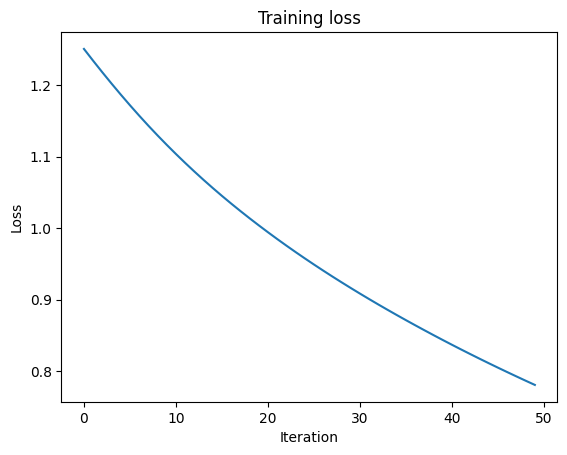

In [87]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [88]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)

def compute_accuracy(model, x_test, y_test):
    pred_probs = model.forward(x_test)
    pred_labels = np.argmax(pred_probs, axis=1)  # Predicted class labels
    accuracy = np.mean(pred_labels == y_test)  # Percentage of correct predictions
    return accuracy

acc = compute_accuracy(nn, x_test, y_test)

#############################

print(acc)

0.716252518468771
